# EDA cars

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

## Descarga de los datos que utilizaremos 
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/download?datasetVersionNumber=10

# filtrado y procesamiento de datos 

In [2]:
cars = pd.read_csv("cars.csv")


In [3]:
cars.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [5]:
cars.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
###ahora vemos el tipo de datos que tenemos  
cars.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [9]:
####checamos cuantas variables tinen datos nulos y que cantidad 
cars.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [11]:
cars.shape

(426880, 26)

In [4]:
##eliminamos algunas variables que no aportan para este análisis
carsFilter=cars.drop(["county", "size",'url', 'region', 'region_url','VIN', 'drive','image_url', 'description','lat', 'long',
       'posting_date'] , axis = 'columns')

In [6]:
carsFilter.columns

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'type',
       'paint_color', 'state'],
      dtype='object')

In [18]:
carsFilter.cylinders.value_counts()





6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [409]:
####para este analisis solo queremos carros en buenas codiciones por lo que solo nos quedaremos con los clean 
####ademas son la mayoria por lo que filtraremos por esa variable 
carsFilterClean=carsFilter[carsFilter["title_status"]=="clean"]


In [430]:
####tambien filtramos para hacer el analisis unicamnete con modelos 2010-2020 precios mayores a 100 y kilometrje mayor a 0  y menor a 1000000
carsFilterCleanDec=carsFilterClean[(carsFilterClean["year"] >= 2010 ) & (carsFilterClean["year"] < 2022 )& (carsFilterClean["price"] > 100) & (carsFilterClean["odometer"]>100) & (carsFilterClean["odometer"] <= 1000000.0)]


In [193]:
carsFilterCleanDec["year"].unique()

array([2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019., 2011.,
       2018., 2015., 2021.])

In [431]:
###ahora elimnaremos los datso nulos 
cars_preprocessed=carsFilterCleanDec.dropna()
cars_preprocessed.shape

(73828, 14)

In [434]:
###a este DataFrame le vamos añadir una columna de frecuencias de modelos para eliminar los que solo hay uno 
model_freq = dict(cars_preprocessed['model'].value_counts())
cars_preprocessed['model_freq'] = cars_preprocessed['model']
cars_preprocessed['model_freq'] = cars_preprocessed['model_freq'].map(model_freq)


/tmp/ipykernel_21351/431666056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_preprocessed['model_freq'] = cars_preprocessed['model']
/tmp/ipykernel_21351/431666056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_preprocessed['model_freq'] = cars_preprocessed['model_freq'].map(model_freq)


In [435]:
###ahora si filtramos por su frecuencia nos quedamos con los que tengas más de 10 
cars_processed=cars_preprocessed[cars_preprocessed["model_freq"] >= 10]


In [436]:
###observamos con cuantos datos nos quedamos 
cars_processed.shape

(60913, 15)

In [437]:
cars_processed.manufacturer.value_counts()

ford             10717
chevrolet         9785
toyota            4671
gmc               3591
nissan            3541
jeep              3089
ram               2947
honda             2580
dodge             2439
hyundai           1613
kia               1317
volkswagen        1312
mercedes-benz     1252
bmw               1250
subaru            1201
lexus             1163
acura             1134
audi              1133
infiniti          1117
chrysler           961
buick              760
cadillac           733
lincoln            732
mazda              490
mitsubishi         361
mini               243
rover              230
volvo              200
jaguar             147
fiat                90
porsche             87
mercury             16
alfa-romeo          10
land rover           1
Name: manufacturer, dtype: int64

In [421]:
## Por úlltimo trasnformar a variables objetos a categoricas y tambien los años a enteros 

cars_processed.astype({"manufacturer":"category",
                             "model":"category",
                              "condition":"category",
                             "cylinders":"category",
                               "fuel":"category",
                               "title_status":"category",
                               "transmission":"category",
                               "type":"category",
                               "paint_color":"category",
                               "state":"category",
                               "year":"int"
                            
                             })

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,paint_color,state,model_freq
27,7316814884,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,pickup,white,al,220
28,7316814758,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,pickup,blue,al,945
29,7316814989,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,pickup,red,al,299
30,7316743432,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,pickup,red,al,288
31,7316356412,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,truck,black,al,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426860,7301951544,39990,2017,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,other,black,wy,42
426864,7301949196,29590,2016,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,SUV,black,wy,285
426866,7301949190,32990,2016,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,other,black,wy,42
426874,7301591199,33590,2018,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,sedan,white,wy,156


# Conteo y proporciones 

### Resumen general de los datos 

#### variables numericas 

In [201]:
###solo variables numéricas
cars_processed.describe(include=[np.number])

,id,price,year,odometer,model_freq
count,6.126100e+04,61261.000000,61261.000000,6.126100e+04,61261.000000
mean,7.311359e+09,22544.390167,2014.851406,7.776192e+04,175.529864
std,4.370069e+06,13314.819558,2.911903,6.977256e+04,191.704965
min,7.301589e+09,3.000000,2010.000000,2.000000e+00,10.000000
25%,7.308060e+09,10995.000000,2012.000000,3.133700e+04,41.000000
50%,7.312286e+09,21000.000000,2015.000000,7.122900e+04,115.000000
75%,7.315056e+09,32500.000000,2017.000000,1.140000e+05,260.000000
max,7.317096e+09,175000.000000,2021.000000,1.000000e+07,973.000000


#### variables categoricas 

In [202]:
##solo variables categoricas 
cars_processed.describe(include=object) 

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,type,paint_color,state
count,61261,61261,61261,61261,61261,61261,61261,61261,61261,61261
unique,34,1154,6,8,5,1,3,13,12,51
top,ford,f-150,good,6 cylinders,gas,clean,automatic,sedan,white,ca
freq,10753,973,31504,25732,55873,61261,41879,15370,16850,6217


### ¿Cuales son las marcas de autos usados mas vendidas en los ultimos años ?

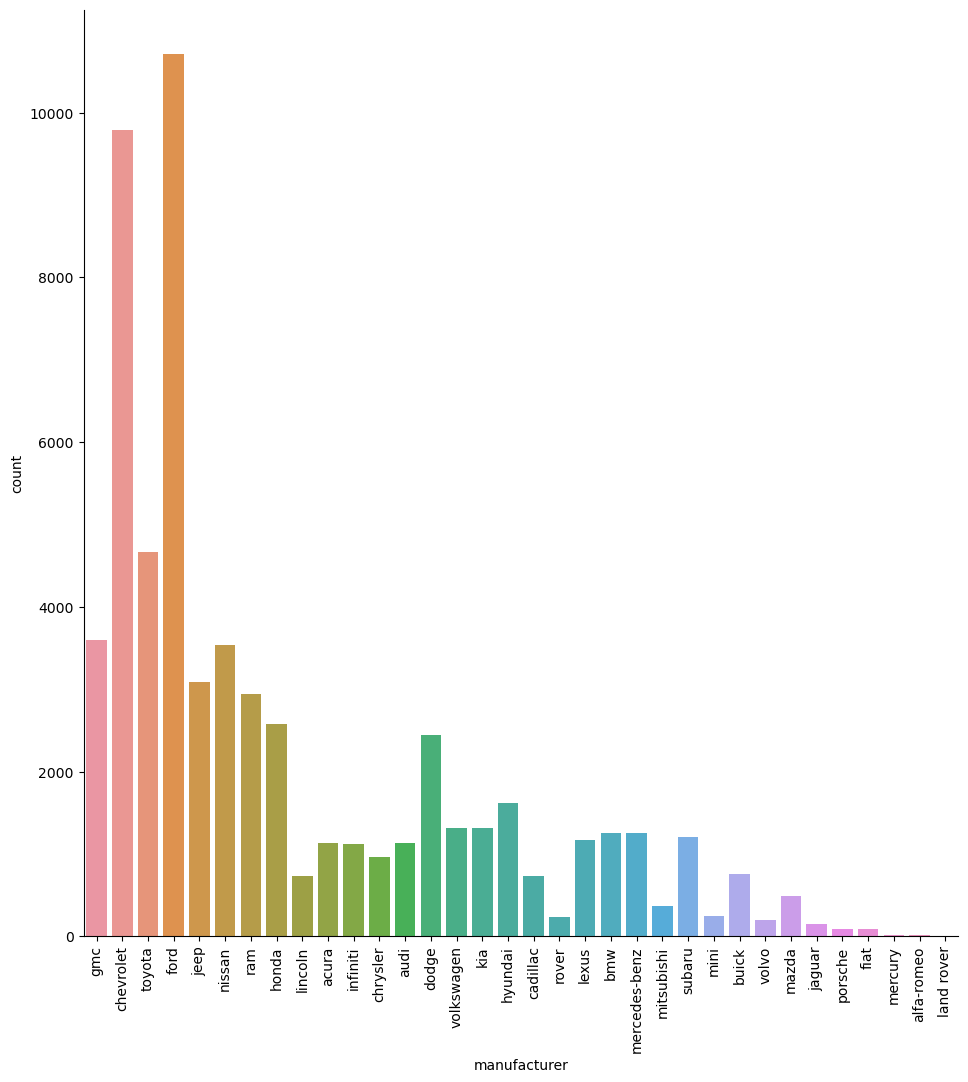

In [525]:
###cuale s la maraca que mas se ha vendido en los ultimos años 
g=sns.catplot(data=cars_processed,x="manufacturer", dodge= True, kind="count", height=10)
g.set_xticklabels(rotation=90) 
plt.show()



## Ahora lo vemos por año 

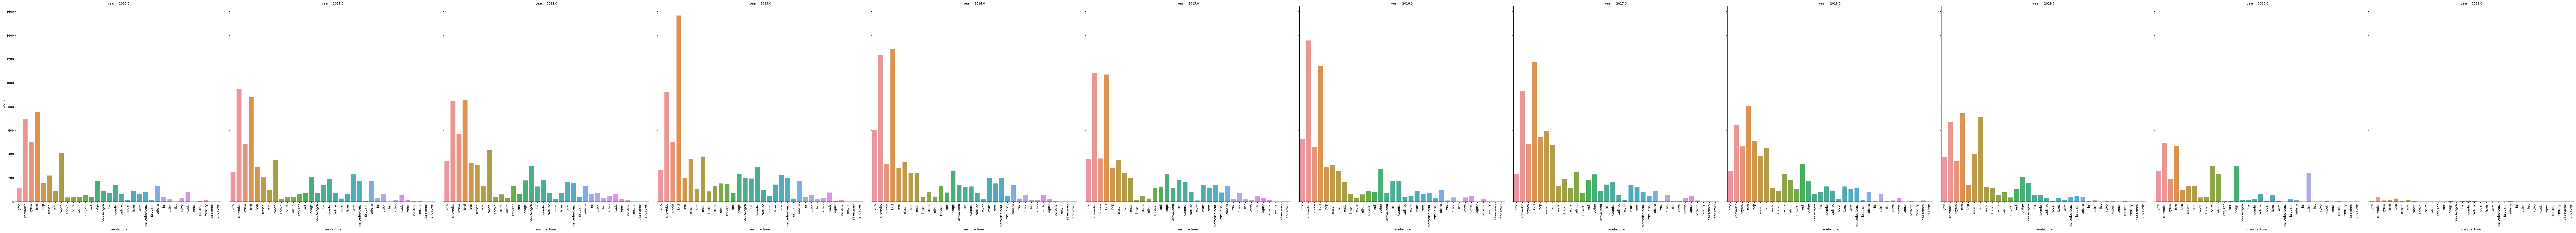

In [204]:
g=sns.catplot(data=cars_processed,x="manufacturer", dodge= True, kind="count", height=10, col="year")
g.set_xticklabels(rotation=90) 
plt.show()

### Qué tipo de transmisión es la más vendida?

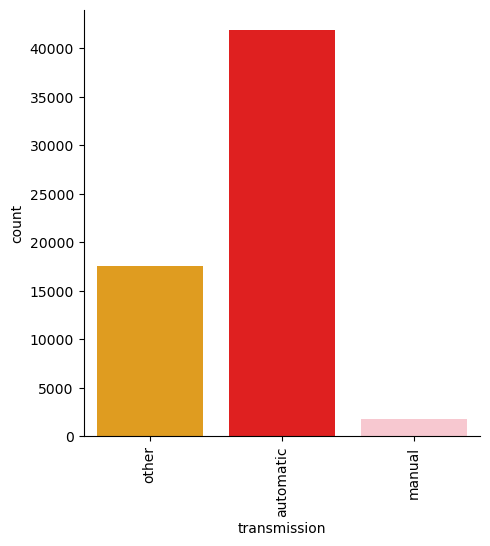

In [238]:
###en su gran mayoria electricos 
g=sns.catplot(data=cars_processed,x="transmission", dodge= True, kind="count", palette=("orange","red","pink"))
g.set_xticklabels(rotation=90) 
plt.show()


### Colores de autos  más vendidos 

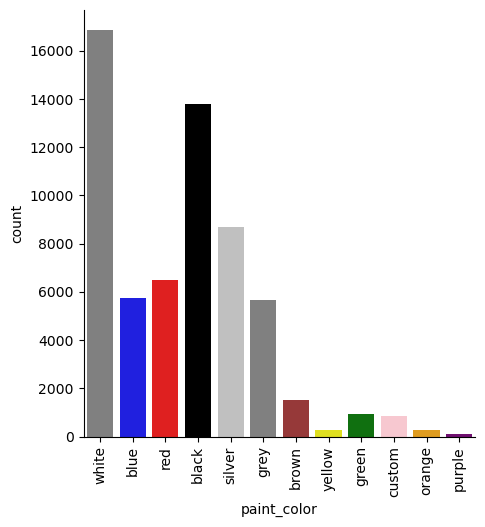

In [206]:
g=sns.catplot(data=cars_processed,x="paint_color", dodge= True, kind="count", palette= ('grey', 'blue', 'red', 'black', 'silver','grey', 'brown','yellow', 'green',  "pink",'orange',  'purple'))
g.set_xticklabels(rotation=90) 
plt.show()

# Sacar medidas de tenedencia central 

### precio promedio sin importar marca y modelo  

In [207]:
cars_processed.price.mean()

22544.390166663947

In [208]:
cars_processed.price.median()

21000.0

### precio promedio por marca  y modelo 

In [209]:
promedio_marca= cars_processed[['price',"manufacturer"]].groupby("manufacturer").mean()
promedio_marca.reset_index()

,manufacturer,price
0,acura,27958.154049
1,alfa-romeo,29534.000000
2,audi,30613.463372
3,bmw,21541.610935
4,buick,23452.961842
5,cadillac,24188.492537
6,chevrolet,24721.388511
7,chrysler,12922.615784
8,dodge,21411.306354
9,fiat,7246.098901


In [210]:
promedio_modelo= cars_processed[['price',"model"]].groupby("model").mean()
promedio_modelo.reset_index()


,model,price
0,1500,24461.753346
1,1500 4x4,23565.320755
2,1500 big horn,30340.272727
3,1500 classic,32926.916667
4,1500 classic crew cab,37790.000000
...,...,...
1149,yukon slt,24084.807692
1150,yukon slt sport utility 4d,47061.641791
1151,yukon xl,26338.901961
1152,yukon xl denali,24882.884615


### Mediana por marca y por modelo 

In [211]:
mediana_marca= cars_processed[['price',"manufacturer"]].groupby("manufacturer").median()
mediana_marca.reset_index()

,manufacturer,price
0,acura,27590.0
1,alfa-romeo,29225.0
2,audi,32990.0
3,bmw,16988.0
4,buick,22990.0
5,cadillac,19900.0
6,chevrolet,24990.0
7,chrysler,10995.0
8,dodge,20495.0
9,fiat,6800.0


In [212]:
median_modelo= cars_processed[['price',"model"]].groupby("model").median()
median_modelo.reset_index()


,model,price
0,1500,22000.0
1,1500 4x4,23995.0
2,1500 big horn,32888.0
3,1500 classic,33900.0
4,1500 classic crew cab,37790.0
...,...,...
1149,yukon slt,26738.5
1150,yukon slt sport utility 4d,47590.0
1151,yukon xl,26988.0
1152,yukon xl denali,17445.0


## Medidas de dispersion 

#### valores maximos y minimos del precio y kilometraje 

In [423]:
###justo podemos ver que la base de datos presentsa muchos errores de dedo 
print("valor maximo precio => ",cars_processed.price.max())
print("valor minimo precio => ",cars_processed.price.min())

valor maximo precio =>  175000
valor minimo precio =>  123


In [438]:
###justo podemos ver que la base de datos presentsa muchos errores de dedo 
print("valor maximo kilometraje => ",cars_processed.odometer.max())
print("valor minimo kilometraje => ",cars_processed.odometer.min())

valor maximo kilometraje =>  999999.0
valor minimo kilometraje =>  101.0


## Resumen de los maximos y minimos  por marca de autos para  cada uan de las variables 

In [248]:
cars_processed.groupby("manufacturer").agg(["min","max"])

id              price            year          \
                      min         max    min     max     min     max   
manufacturer                                                           
acura          7301591111  7317020139    359   89000  2010.0  2020.0   
alfa-romeo     7303361158  7316588869  28548   31900  2018.0  2018.0   
audi           7301591139  7317021122    229   64590  2010.0  2020.0   
bmw            7301613420  7317038374    275   95000  2010.0  2020.0   
buick          7301591158  7317000744    239   46900  2010.0  2021.0   
cadillac       7301594267  7317021456     10  126995  2010.0  2021.0   
chevrolet      7301590585  7317093436      4  130000  2010.0  2021.0   
chrysler       7301639482  7317055040     85   36999  2010.0  2020.0   
dodge          7301588558  7317052414      9   85000  2010.0  2021.0   
fiat           7301625216  7317028588   3650   16500  2012.0  2018.0   
ford           7301592358  7317095796     15  103500  2010.0  2021.0   
gmc            7301614140  7317080653    168  175000  2010.0  2021.0   
honda          7301590293  7317081871     50   66990  2010.0  2021.0   
hyundai        7301648777  7317053692      7   29995  2010.0  2021.0   
infiniti       7301594245  7317028809     24   52000  2010.0  2020.0   
jaguar         7301594206  7316519925   6250   44990  2010.0  2019.0   
jeep           7301642814  7317082154     28   91500  2010.0  2021.0   
kia            7301646814  7317055505     85   43590  2010.0  2021.0   
land rover     7314020640  7314020640   7995    7995  2010.0  2010.0   
lexus          7301591131  7317049317    199   73995  2010.0  2020.0   
lincoln        7301594233  7317027291    123   72599  2010.0  2020.0   
mazda          7301647055  7317060758    599   29500  2010.0  2020.0   
mercedes-benz  7301591170  7317070815     23  135000  2010.0  2020.0   
mercury        7307446489  7316126118    499    9995  2010.0  2011.0   
mini           7301922965  7317091180   2250   29000  2010.0  2020.0   
mitsubishi     7301808898  7317007116    195   38990  2010.0  2020.0   
nissan         7301594875  7317085257     13   51000  2010.0  2021.0   
porsche        7304348763  7317086993  12995   84950  2010.0  2020.0   
ram            7301603652  7317096069     75   95000  2010.0  2021.0   
rover          7302447133  7317069762   5500  124900  2010.0  2020.0   
subaru         7301716849  7317087218      7   41995  2010.0  2021.0   
toyota         7301588610  7317080335      3  131500  2010.0  2021.0   
volkswagen     7301596005  7317055248     10   41590  2010.0  2021.0   
volvo          7302122084  7316943883   2000  144832  2010.0  2019.0   

                                  model                             condition  \
                                    min                        max        min   
manufacturer                                                                    
acura                               ilx                        tsx  excellent   
alfa-romeo                romeo stelvio              romeo stelvio  excellent   
audi                                 a3     sq5 premium plus sport  excellent   
bmw                            3 series                       x6 m  excellent   
buick                           enclave                     verano  excellent   
cadillac                            ats        xts luxury sedan 4d  excellent   
chevrolet                          1500                       volt  excellent   
chrysler                            200               town country  excellent   
dodge                              1500             promaster 3500  excellent   
fiat                                500                       500l  excellent   
ford                       c-max hybrid           transit wagon xl  excellent   
gmc                                1500               yukon xl slt  excellent   
honda                            accord                   santa fe  excellent   
hyundai                          accent           veracruz lim

In [526]:
####la desviavcion estandar es muy granade por los errores de dedo 
print("std del precio =>",cars_processed.price.std())
print("std del kilometraje =>",cars_processed.odometer.std())

std del precio => 13227.3968714647
std del kilometraje => 54548.02667983423


## Visualizacion de la distribucion de las variables contemplando unicamente las marcas mas vendidas (ford, chevrolet y toyota)

In [440]:
####solo lo haremos de las tres marcas mas vendiudas 
cars_processed_marca = cars_processed[cars_processed.manufacturer.isin(["chevrolet","toyota","ford"])]

marca_color = {
    'chevrolet': '#ff6602ff',
    'toyota': '#0f7175ff',
    'ford': '#c65dc9ff'
}

### Distribucion del precio contemplando los autos más vendidos  

<Figure size 2000x2000 with 0 Axes>

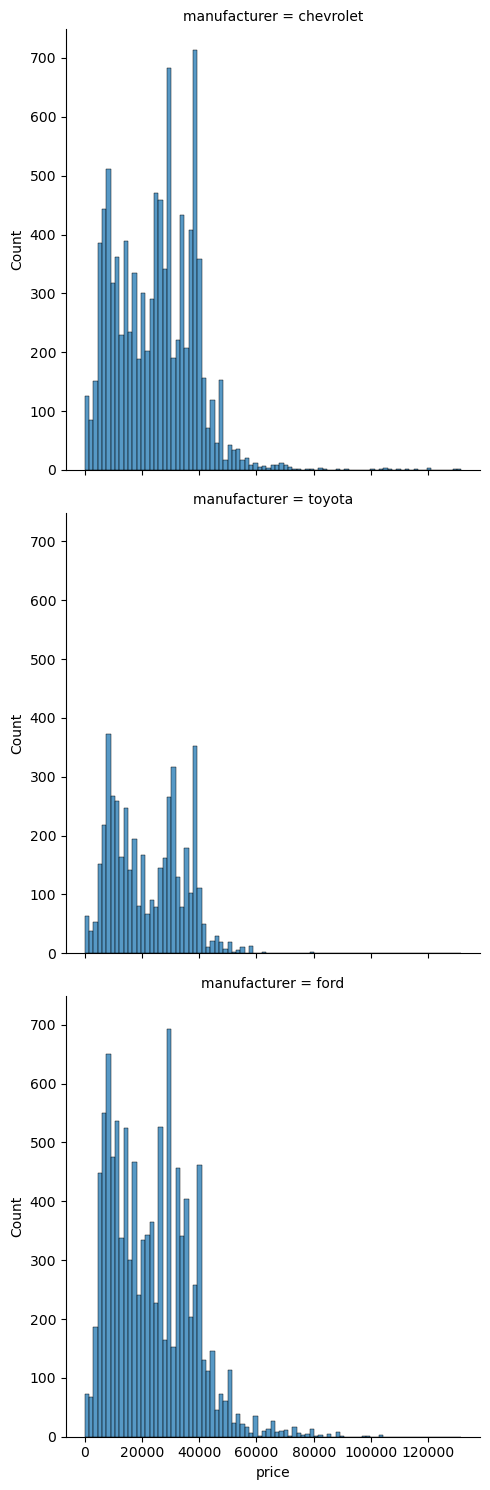

In [350]:

plt.figure(figsize=(20,20))
sns.displot(
    data=cars_processed_marca, 
    x= "price",
    row= "manufacturer",
palette= marca_color)
plt.show()

### Boxplot del precio para las 3 marcas de auto más vendido

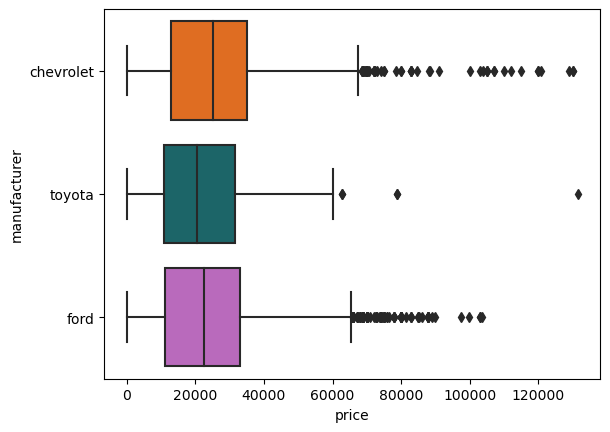

In [351]:
sns.boxplot(
data=cars_processed_marca,
x="price",
y="manufacturer",
palette= marca_color)
plt.show()

## Funciones de probabilidad de masas (PMFs)

### PMFs para el precio 

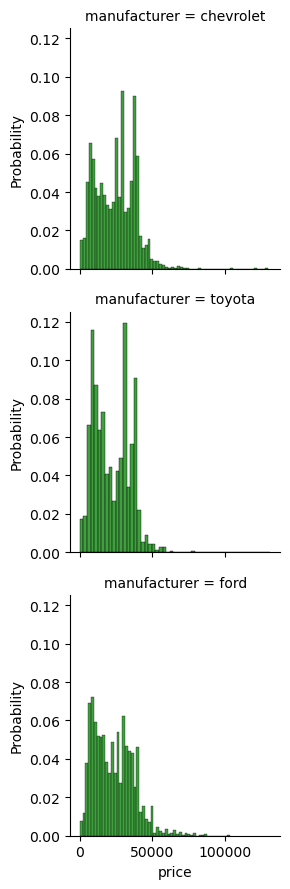

In [355]:
g = sns.FacetGrid(cars_processed_marca, row="manufacturer")
g.map_dataframe(sns.histplot, x="price", 
                stat="probability", color= "green",)
plt.show()


## Probabilidad acumulada (ECDFs)
 
por marca de auto

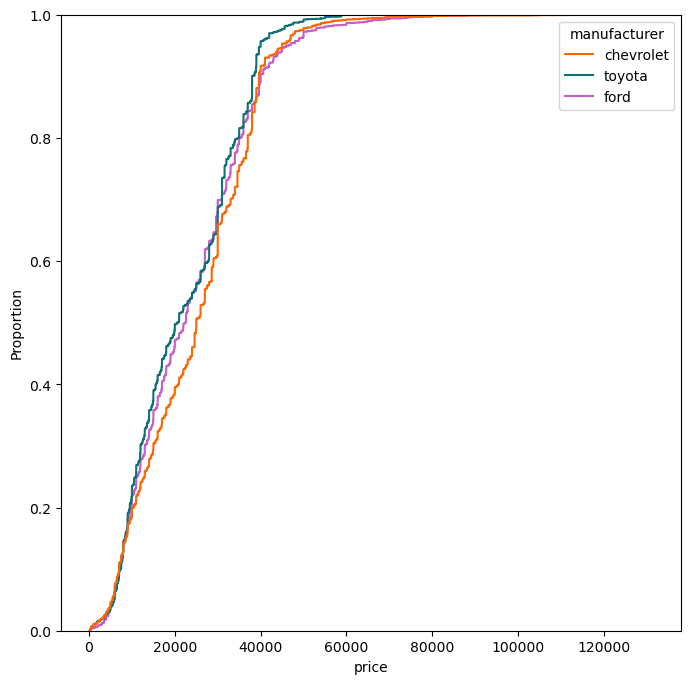

In [528]:
  plt.figure(figsize=(8,8))
sns.ecdfplot(
    data=cars_processed_marca,
    x="price",
    hue= "manufacturer",
    palette= marca_color
)
plt.show()

# Densidad de porbailidad contemplando el precio de las 3 marcas  más vendidas de autos (ford, chevrolet y toyota)

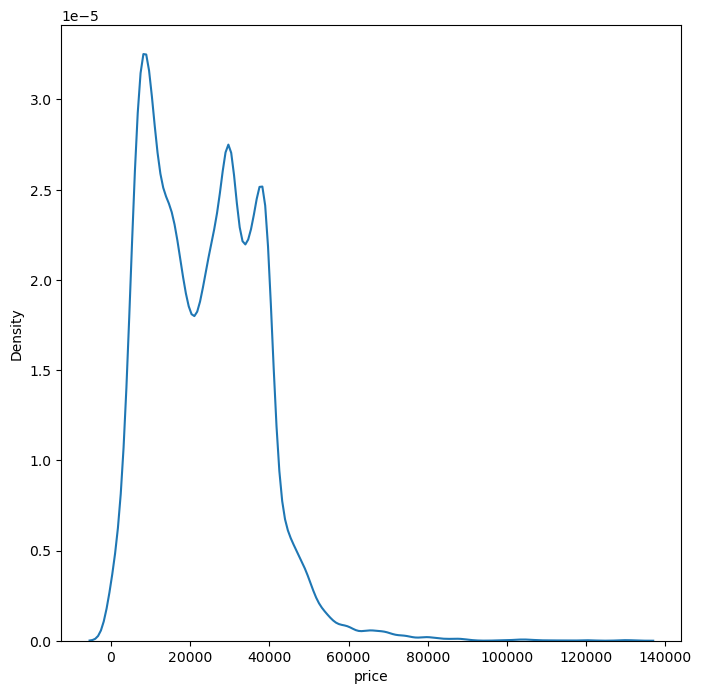

In [363]:
  plt.figure(figsize=(8,8))
sns.kdeplot(
    data=cars_processed_marca, 
    x= "price"###parametro para cambiar el bin como en los histogramas 
    )
plt.show()

## Comparamos la CDFs y PDFs teorica con la de nuesrtos datos 

In [365]:
stats=cars_processed_marca.price.describe()


count     25293.000000
mean      23677.901079
std       13717.203191
min           3.000000
25%       11785.000000
50%       23500.000000
75%       33990.000000
max      131500.000000
Name: price, dtype: float64

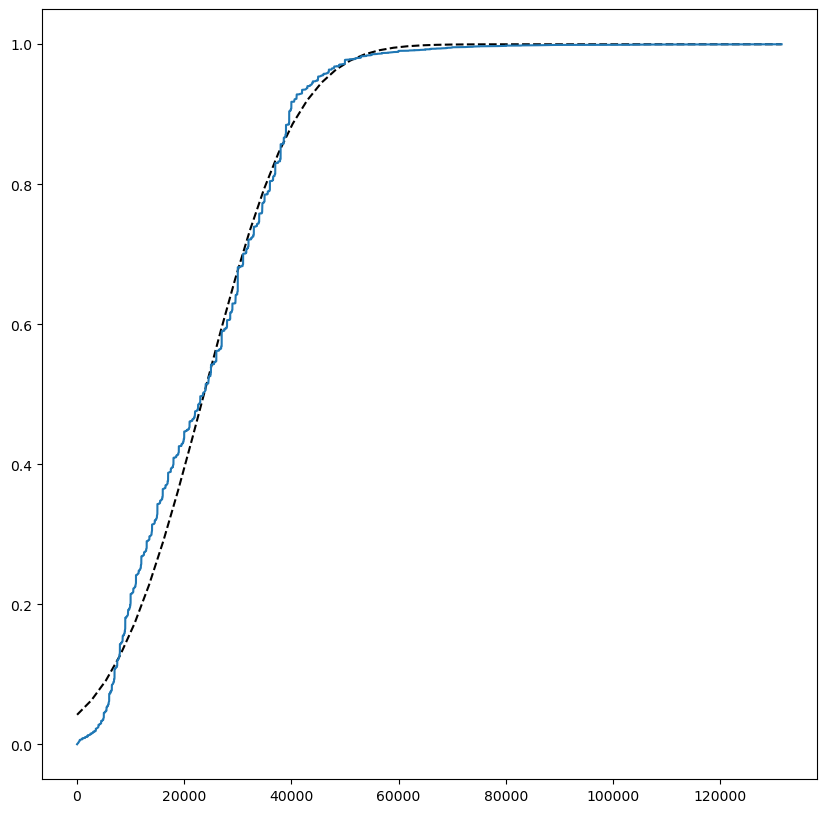

In [369]:
##ahora vamos a comprar la densidad acumulada de nuestros datos y la teorica 
###primero hacemos un set de datos normales con los mismos parametros que los nuestros 
stats=cars_processed_marca.price.describe()
plt.figure(figsize=(10,10))
xs= np.linspace(stats["min"],stats["max"])
ys=scipy.stats.norm(stats["mean"],stats["std"]).cdf(xs)
plt.plot(xs, ys, color="black", linestyle="dashed")

####luego hacemos una grafica super puesta de nuestroas datos 
empiricaldist.Cdf.from_seq(
    cars_processed_marca.price,
    normalize=True).plot()
plt.show()

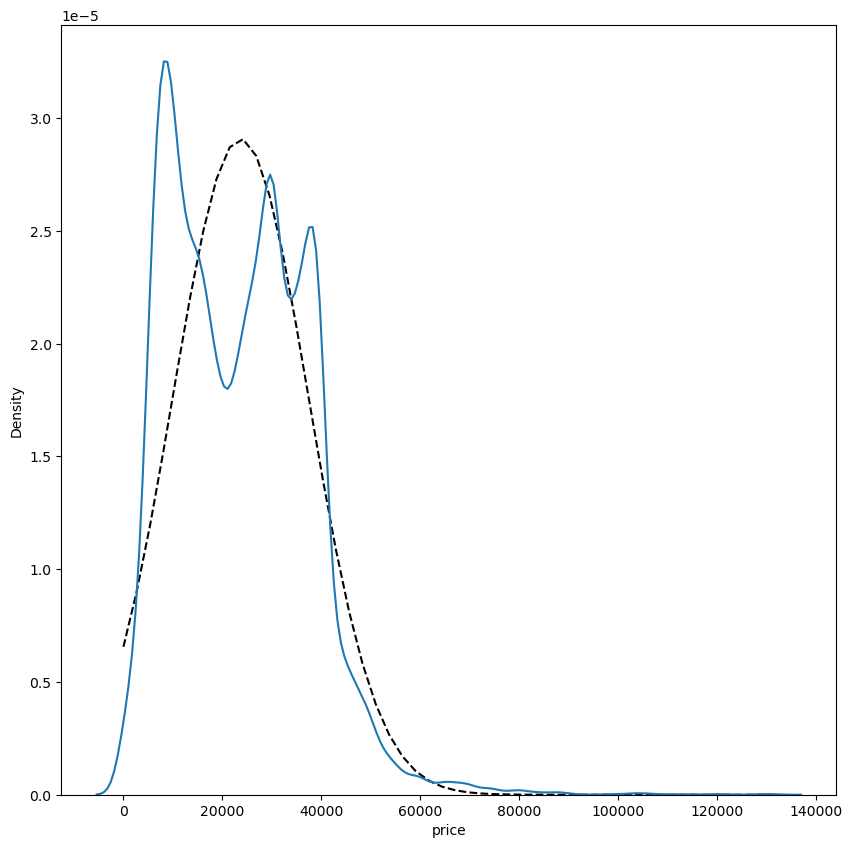

In [374]:
stats=cars_processed_marca.price.describe()
plt.figure(figsize=(10,10))
xs= np.linspace(stats["min"],stats["max"])
ys=scipy.stats.norm(stats["mean"],stats["std"]).pdf(xs)
plt.plot(xs, ys, color="black", linestyle="dashed")

####luego hacemos una grafica super puesta de nuestroas datos 
####luego hacemos una grafica super puesta de nuestroas datos 
sns.kdeplot(
    data=cars_processed_marca,
    x="price"
)

plt.show()

# Relacion entre variables 

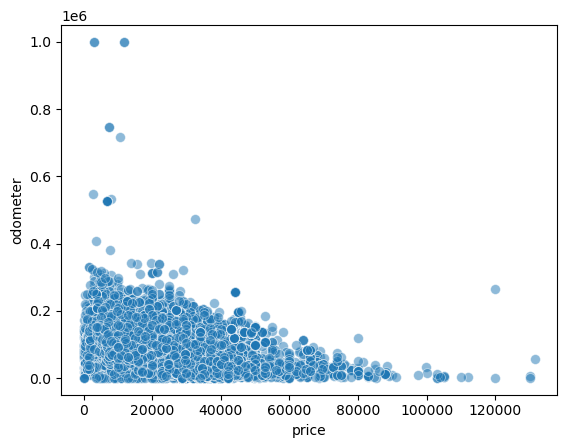

In [450]:
sns.scatterplot(data=cars_processed_marca,
               x="price",
               y="odometer",
               alpha= 1/2, 
               s=50)
plt.show()

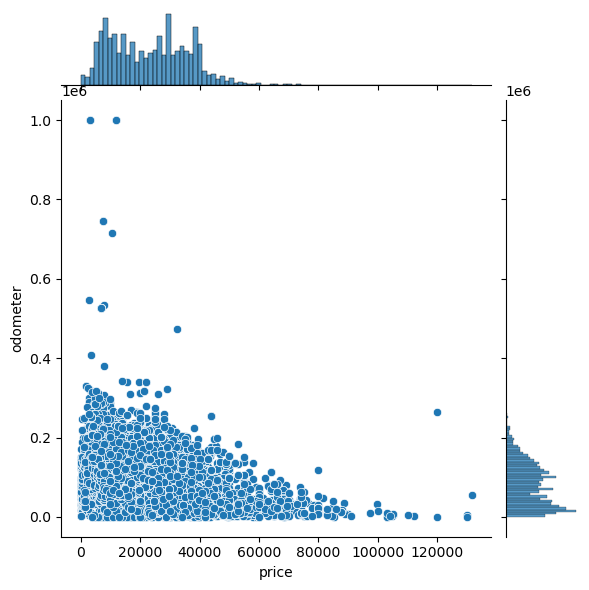

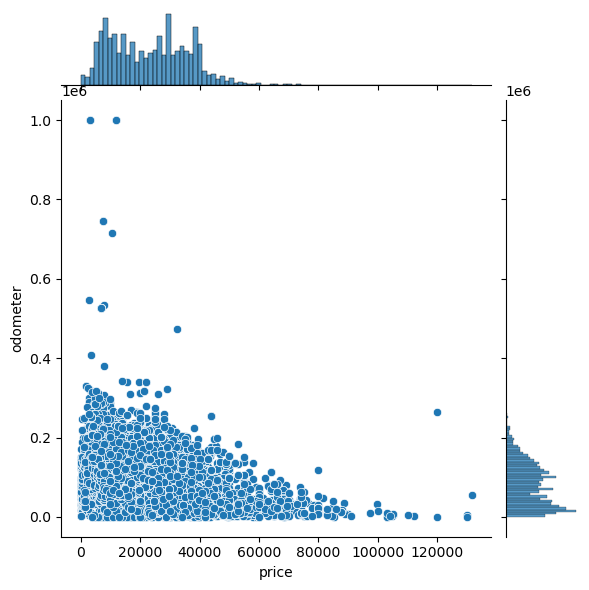

In [447]:
sns.jointplot(data= cars_processed_marca, 
x= "price",
y= "odometer", 
)
plt.show()

## Matrices de correlación

In [455]:
##vamos a filtarar el id y el model_freq para que viaulmente este mejor 
cars_processed_marca2=cars_processed_marca.drop(["id","model_freq"] , axis = 'columns')

In [457]:

cars_processed_marca2.corr()

,price,year,odometer
price,1.000000,0.553796,-0.546786
year,0.553796,1.000000,-0.574337
odometer,-0.546786,-0.574337,1.000000


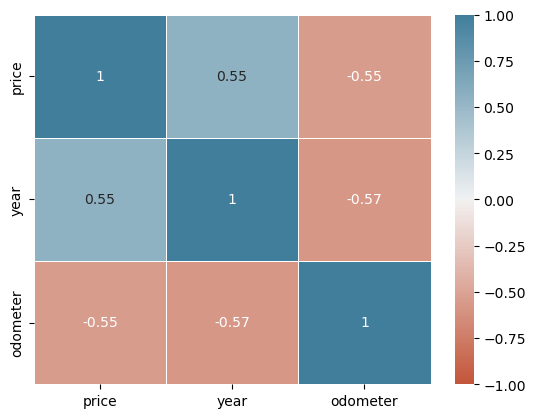

In [458]:

sns.heatmap(
    data=cars_processed_marca2.corr(),
    cmap= sns.diverging_palette(20,230, as_cmap=True), 
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5, 
    annot=True 
)
plt.show()

Podemos observar las correlaciones positivas y negativas de las distintas variables 

## Análisis de regresión simple 

In [471]:
###regresion lineal simple de año y precio viendo que hay una correlacion positiva 
reg_cars1=scipy.stats.linregress(
        x= cars_processed_marca.year,
        y= cars_processed_marca.price)
reg_cars1

LinregressResult(slope=2635.90326059137, intercept=-5286868.241758588, rvalue=0.5537963346416346, pvalue=0.0, stderr=24.980019240817878, intercept_stderr=50327.02048343845)

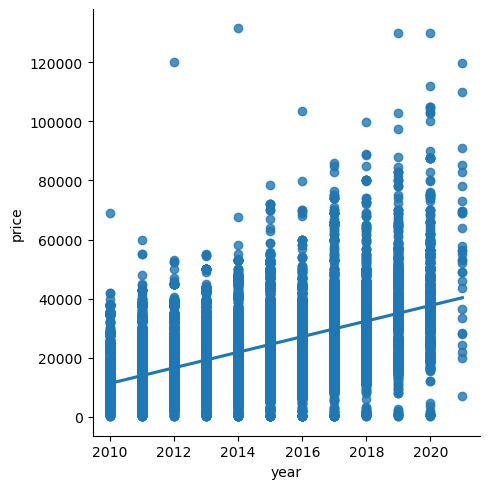

In [481]:
sns.lmplot(
    data= cars_processed_marca2,
    x='year',
    y="price",
)
plt.show()

In [475]:
###regresion lineal simple de kilometraje  y año viendo que hay una correlacion positiva 
reg_cars2=scipy.stats.linregress(
        x= cars_processed_marca.price,
        y= cars_processed_marca.odometer)
reg_cars2

LinregressResult(slope=-2.337735825568052, intercept=137498.91765686567, rvalue=-0.5467860049423992, pvalue=0.0, stderr=0.022562882434525013, intercept_stderr=615.8092901986021)

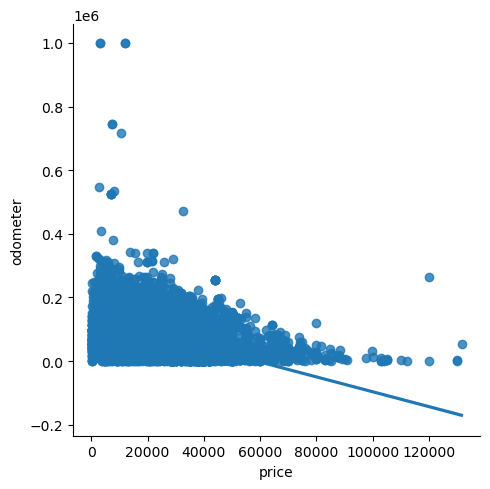

In [477]:
sns.lmplot(
    data= cars_processed_marca2,
    x='price',
    y="odometer"
    
)
plt.show()

# Análisis de regresión múltiple

In [486]:
model_1= (
    smf.ols(
        formula="price~odometer", 
        data=cars_processed_marca            
    )
    .fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:59:17   Log-Likelihood:            -2.7086e+05
No. Observations:               25173   AIC:                         5.417e+05
Df Residuals:                   25171   BIC:                         5.417e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.417e+04    124.310    274.869      0.000    3.39e+04    3.44e+04
odometer      -0.1279      0.001   -103.610      0.000      -0.130      -0.125
==============================================================================
Omnibus:                     5413.809   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22634.470
Skew:                           1.009   Prob(JB):                         0.00
Kurtosis:                       7.184   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [489]:
model_2= (
    smf.ols(
        formula="price~odometer+ year", 
        data=cars_processed_marca            
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     7870.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:02:35   Log-Likelihood:            -2.6922e+05
No. Observations:               25173   AIC:                         5.384e+05
Df Residuals:                   25170   BIC:                         5.385e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.401e+06    5.8e+04    -58.649      0.000   -3.51e+06   -3.29e+06
odometer      -0.0798      0.001    -56.512      0.000      -0.083      -0.077
year        1702.8909     28.746     59.239      0.000    1646.547    1759.235
==============================================================================
Omnibus:                     4500.399   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16209.084
Skew:                           0.878   Prob(JB):                         0.00
Kurtosis:                       6.517   Cond. No.                     8.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [499]:
model_2= (
    smf.ols(
        formula="price~odometer+ year + C(model)", 
        data=cars_processed_marca            
    )
    .fit()
)

In [497]:
model_3= (
    smf.ols(
        formula="price~ year+ C(model)", 
        data=cars_processed_marca            
    )
    .fit()
)


## Ahora vamos a visulaizar los resultados de los modelos 

In [515]:
models_results=pd.DataFrame(
    dict(actual_value=cars_processed_marca2.price,
         prediction_model_1 = model_1.predict(),
         prediction_model_2 = model_2.predict(),
         prediction_model_3 = model_3.predict(),
         model=cars_processed_marca2.model
         
        )
)

models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,model
28,22590,25059.492898,20344.170551,16069.259424,silverado 1500
29,39590,31718.639637,39543.084814,40382.860295,silverado 1500 crew
30,30990,28909.645822,35085.735095,35889.942854,tundra double cab sr
31,15000,17799.003556,20986.338499,21167.157449,f-150 xlt
33,34590,30396.376522,33115.555299,33008.826404,silverado 1500 double
...,...,...,...,...,...
426788,12995,26351.445890,13109.568771,12496.744010,cruze lt
426798,44990,31230.991968,47308.628485,47047.646659,corvette stingray
426800,41990,32521.793943,40572.163357,41772.732306,silverado 1500 double
426857,41990,29484.387135,41117.118737,41352.096800,4runner limited sport


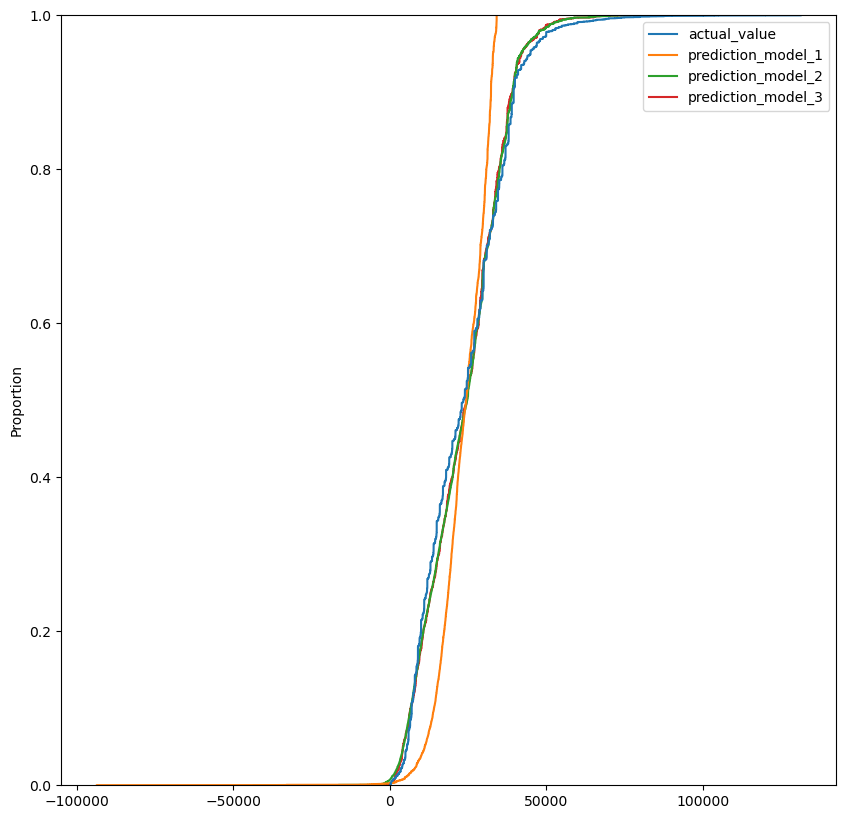

In [520]:
plt.figure(figsize=(10,10))
sns.ecdfplot(
    data=models_results
)
plt.show()


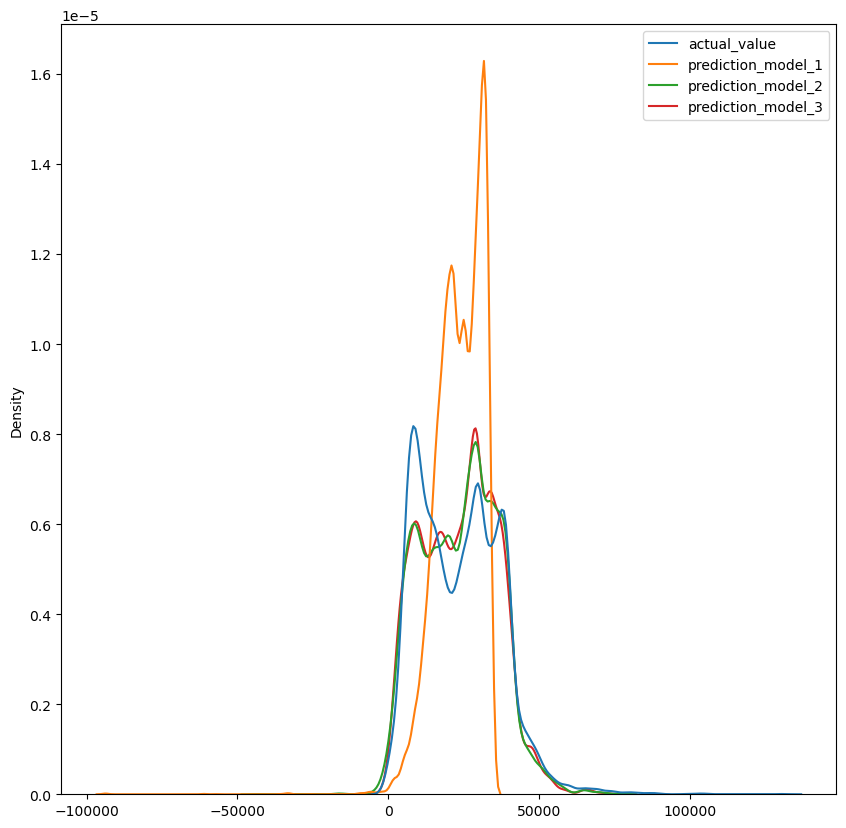

In [524]:
plt.figure(figsize=(10,10))
sns.kdeplot(
    data= models_results
 
)
plt.show()

#### como podemos obsrevar el modelo que se ajusta mejor a los datos de la realidad es el número 3

## Ahora haremos un modelo multiclase 

In [531]:
#importamos lo necesario 
import scipy as scp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix


In [537]:
## filtramos algunas variables que no nos imoortan 
cars_multinominal=cars_processed_marca2.drop(['model', 'condition',"type", 'paint_color', 'state','title_status'], axis=1)
cars_multinominal.head(2)

,price,year,manufacturer,cylinders,fuel,odometer,transmission
28,22590,2010.0,chevrolet,8 cylinders,gas,71229.0,other
29,39590,2020.0,chevrolet,8 cylinders,gas,19160.0,other


### tenemos que pasar las variables categoricas  a numericas  excepto el numero de cilindros porque es la que vamos a utilizar para el modelo por lo que haremos una pequeña fucnion

In [919]:
### funcion 
def categical_to_numeric(df):
    for i in df:
        if df[i].dtype == 'object':
            lista=list(df[i].unique())
            num_cat = len(df[i].unique())
            rep_vals=list(range(num_cat))
            df[i] =df[i].replace(lista,rep_vals)
    return df


In [922]:
df_cars= categical_to_numeric(cars_multinominal)

In [924]:
###listo ya las pasamos a numericas 
df_cars 

,price,year,manufacturer,cylinders,fuel,odometer,transmission
28,22590,2010.0,0,0,0,71229.0,0
29,39590,2020.0,0,0,0,19160.0,0
30,30990,2017.0,1,0,0,41124.0,0
31,15000,2013.0,2,1,0,128000.0,1
33,34590,2016.0,0,1,0,29499.0,0
...,...,...,...,...,...,...,...
426788,12995,2016.0,0,2,0,61127.0,1
426798,44990,2014.0,0,0,0,22973.0,0
426800,41990,2020.0,0,0,0,12880.0,1
426857,41990,2019.0,1,1,0,36630.0,0


### ahora ya tenemos los datos preparados para el análisis

In [1036]:
X = df_cars.drop(['cylinders',"year" , 'manufacturer',"fuel"], axis=1) 
y = cars_processed_marca['cylinders']

In [1018]:
print(list(X.columns.values))
print(list(df_cars))

['price', 'odometer', 'transmission']
['price', 'year', 'manufacturer', 'cylinders', 'fuel', 'odometer', 'transmission']


In [1037]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 20)

In [1026]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20138, 3)
(5035, 3)
(20138,)
(5035,)


In [1038]:
#'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='lbfgs', max_iter=4000).fit(X_train, y_train)
preds = model1.predict(X_test)

In [1039]:
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 4000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [1041]:
#imprimimos los valotres de los modelos 
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)


Intercept: 
 [-1.02148115e-07 -2.32546019e-09  9.71476935e-07 -2.19318257e-08
  2.85416472e-07 -1.11425977e-06 -1.62282316e-08]
Coefficients: 
 [[ 2.54190484e-05 -5.27328523e-06 -3.16405134e-08]
 [-5.93952368e-05 -3.72603240e-05  1.48114739e-09]
 [ 3.45072860e-05  2.55629254e-05  1.35235592e-06]
 [-8.17452463e-05 -6.53302452e-06 -1.82938535e-08]
 [ 1.03363168e-04  1.74802812e-05 -4.54022853e-07]
 [ 1.16831225e-04  1.62362219e-05 -8.34544568e-07]
 [-1.38980244e-04 -1.02127948e-05 -1.53352841e-08]]


In [1042]:
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.781699
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:              cylinders   No. Observations:                20138
Model:                        MNLogit   Df Residuals:                    20114
Method:                           MLE   Df Model:                           18
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.3179
Time:                        13:23:08   Log-Likelihood:                -15742.
converged:                       True   LL-Null:                       -23080.
Covariance Type:            nonrobust   LLR p-value:                     0.000
cylinders=3 cylinders       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.7760      1.031     10.453      0.000       8.756      12

In [1050]:
confusion_matrix(y_test, preds)
confmtrx = np.array(confusion_matrix(y_test, preds))

In [1071]:
lero=pd.DataFrame(confmtrx, index=['8 cylinders', '6 cylinders', '4 cylinders', '10 cylinders',
       '5 cylinders', '3 cylinders', 'other'],
columns=["predicted_8 cylinders", '6_predicted_cylinders', 'predicted_4 cylinders', 'predicted_10 cylinders',
       'predicted_5 cylinders', 'predicted_3 cylinders', 'predicted_other'])

lero


,predicted_8 cylinders,6_predicted_cylinders,predicted_4 cylinders,predicted_10 cylinders,predicted_5 cylinders,predicted_3 cylinders,predicted_other
8 cylinders,0,0,3,0,0,33,0
6 cylinders,0,0,0,0,0,2,0
4 cylinders,0,0,720,0,0,563,0
10 cylinders,0,0,7,0,0,4,0
5 cylinders,0,0,390,0,0,1409,0
3 cylinders,0,0,213,0,0,1688,0
other,0,0,0,0,0,3,0


In [1072]:
###vemos el nivel de accuracy 
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

Accuracy Score: 0.4782522343594836


In [1073]:
reporte=classification_report(y_test, preds)
print(reporte)

              precision    recall  f1-score   support

10 cylinders       0.00      0.00      0.00        36
 3 cylinders       0.00      0.00      0.00         2
 4 cylinders       0.54      0.56      0.55      1283
 5 cylinders       0.00      0.00      0.00        11
 6 cylinders       0.00      0.00      0.00      1799
 8 cylinders       0.46      0.89      0.60      1901
       other       0.00      0.00      0.00         3

    accuracy                           0.48      5035
   macro avg       0.14      0.21      0.16      5035
weighted avg       0.31      0.48      0.37      5035



/home/santiago/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/santiago/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/santiago/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1110]:
lero=[]
def max_value(x,y,z):
    lero.extend([x,y,z])
    caca=sorted(lero)
    return caca[2]
    
max_value(50,23,1)




50

In [1137]:
pop= [8, 2, 3, 0, 40]
lel=0
for i in pop:
    lel+=i
lel

53

In [1143]:
def multip(numbers):
    multi=1
    for x in numbers:
        multi*=x
    return multi



multip((8, 2, 3, -1, 7))

-336